In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

from sklearn.preprocessing import LabelEncoder
import statistics as stats2

from scipy.stats import ttest_ind
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr

In [294]:
df = pd.read_csv("Health_insurance.csv")

In [295]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [296]:
df.shape

(1338, 7)

In [297]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [298]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [299]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## 5 POINT SUMMARY

This function computes summary statistics for numerical columns in the DataFrame. By default, it includes the count, mean, standard deviation (std), minimum (min), 25th percentile (25%), median (50%), 75th percentile (75%), and maximum (max).

We can know the mean, standard deviation, minimum, maximum value of all the columns.
25% of the individuals in the dataset are aged 27 years or younger. Same way, we can infer for all other percentiles.


In [301]:
# Selecting ‘age’, ‘bmi’ and ‘charges’ columns alone
df_attr = df.iloc[:, [0,2,6]] 


print("Skewness of ‘age’, ‘bmi’ and ‘charges’ columns")
df_attr.skew(axis = 0, skipna = True)

Skewness of ‘age’, ‘bmi’ and ‘charges’ columns


age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

Skeweness is seen in 'Charges'- Right Skewed Distribution

Most charges are around a certain range (say 10,000), but there are a few persons who have to pay significantly higher charges.

## BOX PLOT


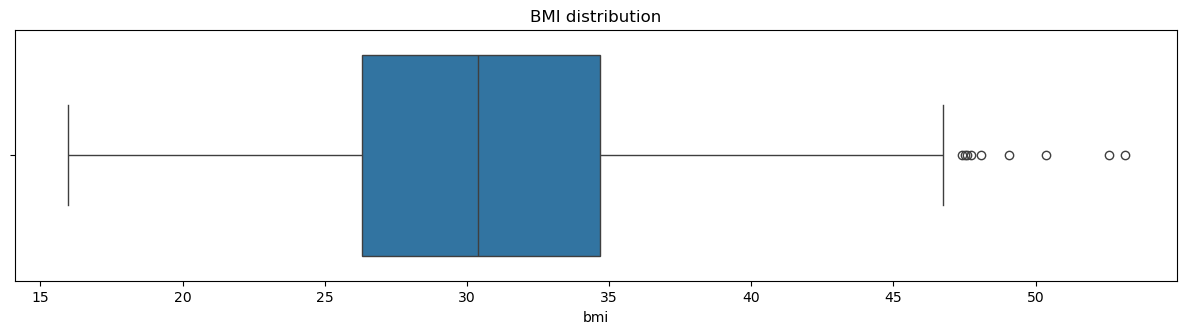

In [304]:
plt.figure(figsize= (15,15))
plt.subplot(4,1,1)
plt.title("BMI distribution");
sns.boxplot(x=df['bmi']);
plt.show();

There are outliers, which are clearly visible in the graph.

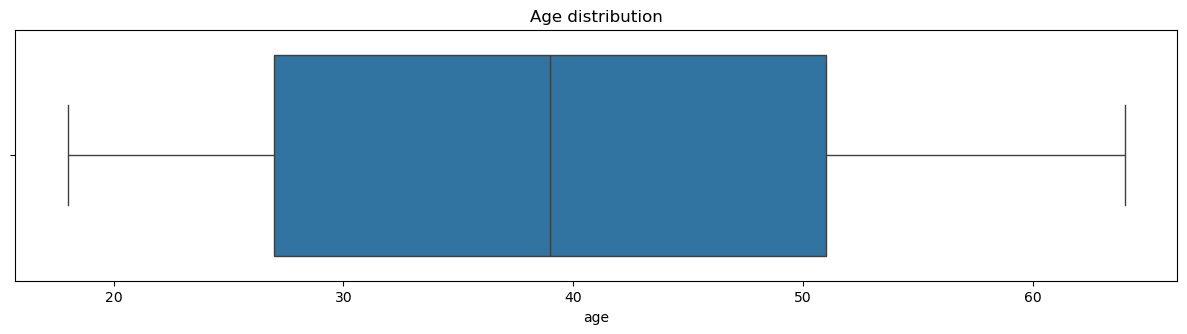

In [306]:
plt.figure(figsize= (15,15))
plt.subplot(4,1,1)
plt.title("Age distribution");
sns.boxplot(x=df['age']);
plt.show();

No outliers are seen in the plot

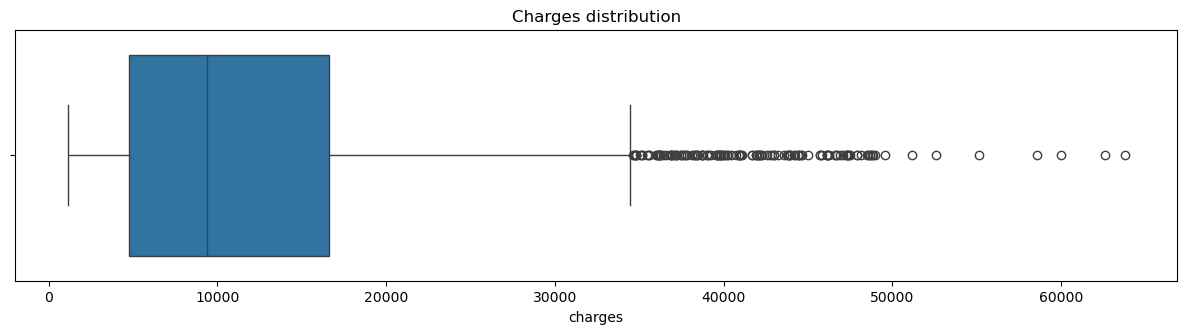

In [308]:
plt.figure(figsize= (15,15))
plt.subplot(4,1,1)
plt.title("Charges distribution");
sns.boxplot(x=df['charges']);
plt.show();

A lot of outliers are present in the figure. We can relate this to the above findings.

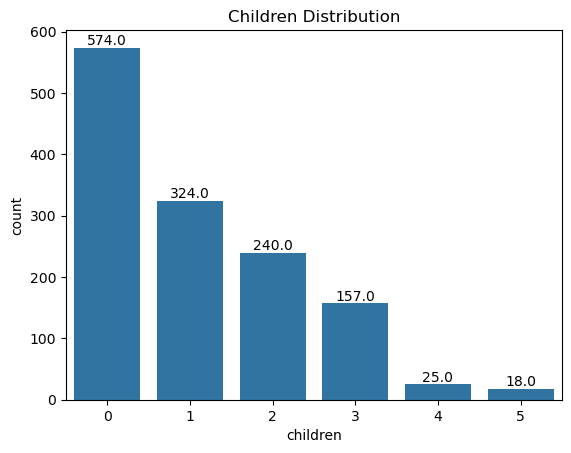

In [310]:
smoker_counts = df['children'].value_counts()

# Plot the distribution using countplot
ax = sns.countplot(x=df['children'])
plt.xlabel("children")
plt.title("Children Distribution")

# Annotate the plot with the counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

There are very few customers who have 4 or 5 children and the majority of the customers don't have children

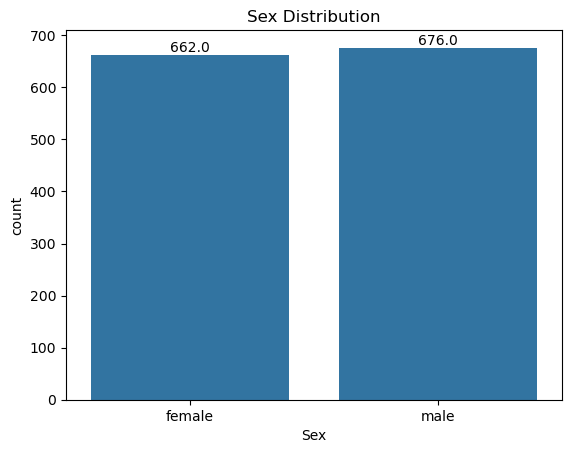

In [312]:
smoker_counts = df['sex'].value_counts()

# Plot the distribution using countplot
ax = sns.countplot(x=df['sex'])
plt.xlabel("Sex")
plt.title("Sex Distribution")

# Annotate the plot with the counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

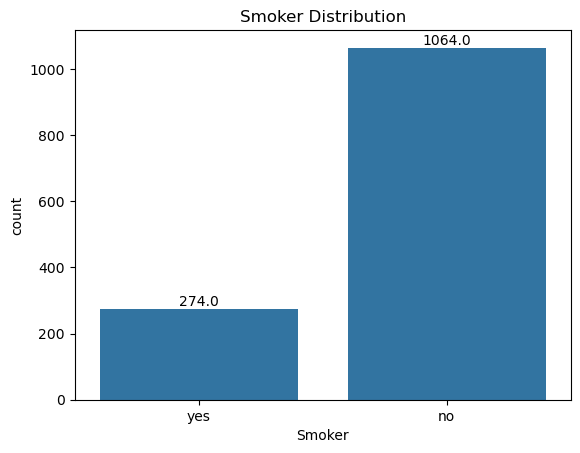

In [313]:
smoker_counts = df['smoker'].value_counts()

# Plot the distribution using countplot
ax = sns.countplot(x=df['smoker'])
plt.xlabel("Smoker")
plt.title("Smoker Distribution")

# Annotate the plot with the counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Majority of them are non smokers

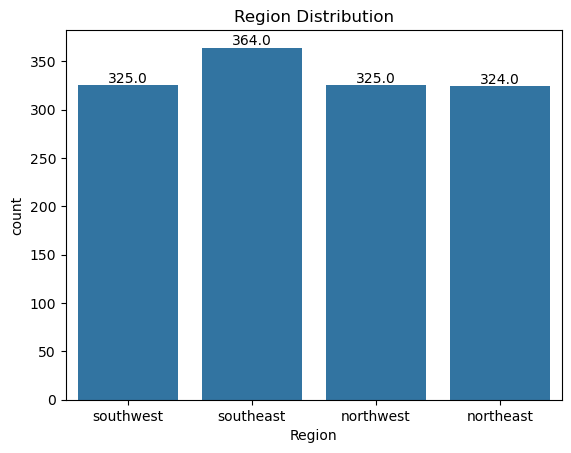

In [315]:
smoker_counts = df['region'].value_counts()

# Plot the distribution using countplot
ax = sns.countplot(x=df['region'])
plt.xlabel("Region")
plt.title("Region Distribution")

# Annotate the plot with the counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

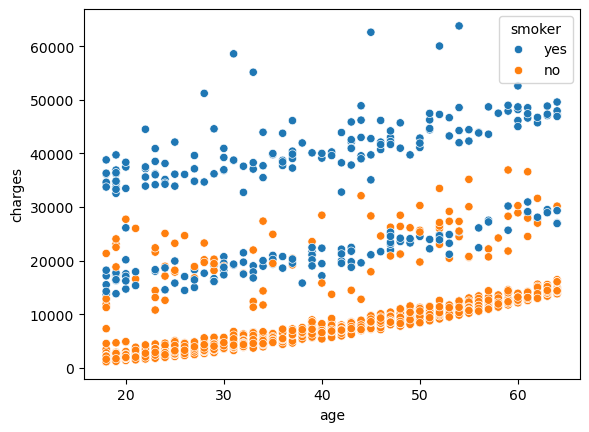

In [316]:
# CHARGES VS AGE WITH SMOKER AS THE LEGEND
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = df);

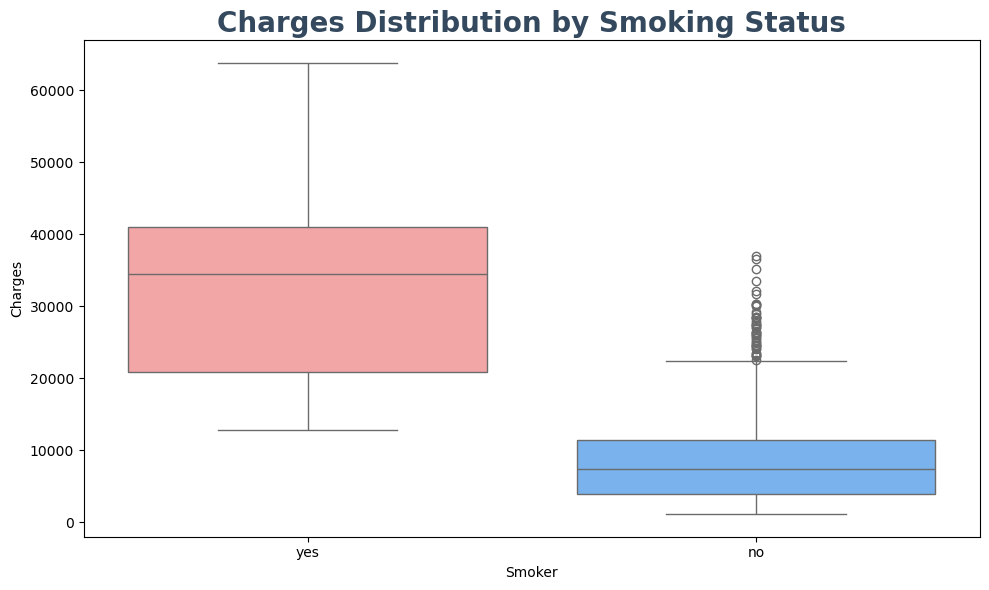

In [317]:
custom_palette = ['#FF9999', '#66B2FF']

# Creating the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette=custom_palette)

# Customizing the plot
plt.title('Charges Distribution by Smoking Status', fontsize=20, fontweight='bold', color='#34495E')
plt.xlabel('Smoker' )
plt.ylabel('Charges' )

# Displaying the plot
plt.tight_layout()
plt.show()

Even if the person is not smoking, there are outliers in the charges, which are clearly seen. It is better to check the percentage of outliers.

In [319]:
non_smokers = df[df['smoker'] == 'no']

Q1_1 = non_smokers['charges'].quantile(0.25)
Q3_1 = non_smokers['charges'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

lower_bound_1 = Q1_1 - 1.5 * IQR_1
upper_bound_1 = Q3_1 + 1.5 * IQR_1

# Identify outliers
outliers_1 = non_smokers[(non_smokers['charges'] < lower_bound_1) | (non_smokers['charges'] > upper_bound_1)]

# Calculate percentage of outliers
percentage_outliers_1 = (len(outliers_1) / len(non_smokers)) * 100
print(f'Percentage of outliers: {percentage_outliers_1:.2f}%')

Percentage of outliers: 4.32%


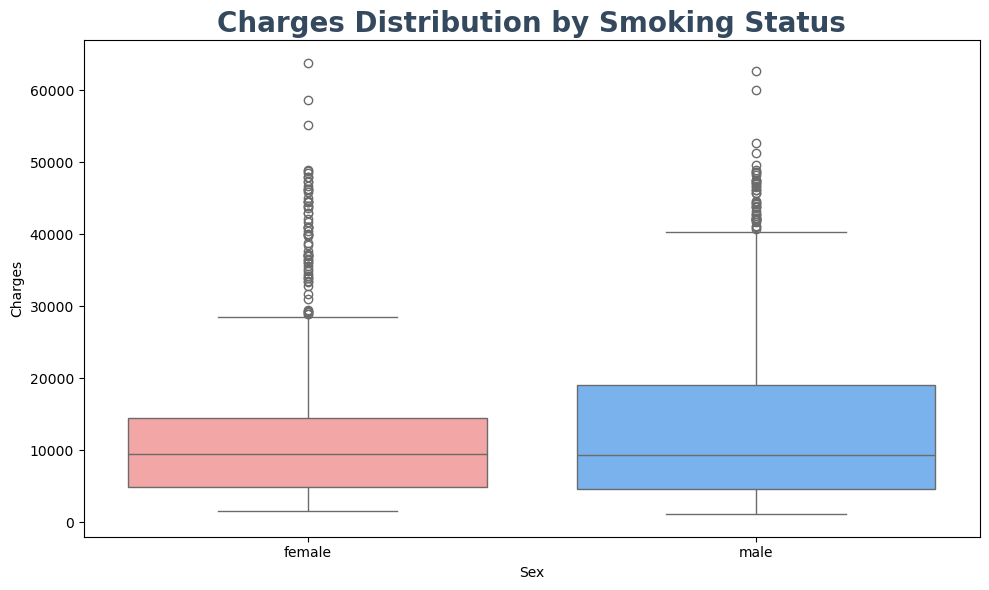

In [320]:
custom_palette = ['#FF9999', '#66B2FF']

# Creating the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=df, palette=custom_palette)

# Customizing the plot
plt.title('Charges Distribution by Smoking Status', fontsize=20, fontweight='bold', color='#34495E')
plt.xlabel('Sex' )
plt.ylabel('Charges' )

# Displaying the plot
plt.tight_layout()
plt.show()

In [321]:
female_df = df[df['sex'] == 'female']

Q1_2 = female_df['charges'].quantile(0.25)
Q3_2 = female_df['charges'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2

lower_bound_2 = Q1_2 - 1.5 * IQR_2
upper_bound_2 = Q3_2 + 1.5 * IQR_2

# Identify outliers
outliers_2 = female_df[(female_df['charges'] < lower_bound_2) | (female_df['charges'] > upper_bound_2)]

# Calculate percentage of outliers
percentage_outliers_2 = (len(outliers_2) / len(female_df)) * 100
print(f'Percentage of outliers: {percentage_outliers_2:.2f}%')

Percentage of outliers: 9.82%


In [322]:
male_df = df[df['sex'] == 'male']

Q1_3 = male_df['charges'].quantile(0.25)
Q3_3 = male_df['charges'].quantile(0.75)
IQR_3 = Q3_3 - Q1_3

lower_bound_3 = Q1_3 - 1.5 * IQR_3
upper_bound_3 = Q3_3 + 1.5 * IQR_3

# Identify outliers
outliers_3 = male_df[(male_df['charges'] < lower_bound_3) | (male_df['charges'] > upper_bound_3)]

# Calculate percentage of outliers
percentage_outliers_3 = (len(outliers_3) / len(male_df)) * 100
print(f'Percentage of outliers: {percentage_outliers_3:.2f}%')

Percentage of outliers: 6.51%


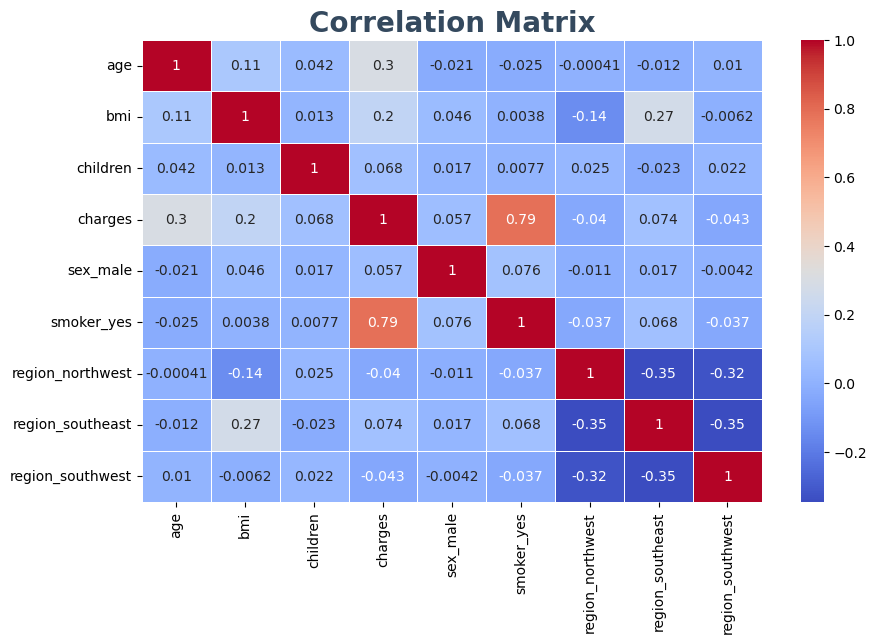

In [323]:
# Converting categorical variables into numeric form using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

corr_matrix = df_encoded.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=20, fontweight='bold', color='#34495E')
plt.show()

Strong correlation is between the person who smokes and the insurance charge. 
The charges are also related with the age factor.

<p style="font-size: 24px; font-family: 'Calibri Light'; line-height: 1.3; font-weight: bold; color: #3366ff;">HYPOTHESIS TESTING</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;font-weight:bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Comparative Analysis of BMI Between Male and Female Customers</p>


<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">H$_0$: BMI of male and female customers is same<br>
H$_a$: BMI of male and female customers is different<br><br>$\alpha$ = 0.05 &nbsp;&nbsp;&nbsp;&nbsp;(95% Confidence Interval)</p>

In [326]:
male_bmi = df[df['sex'] == 'male'].bmi
female_bmi = df[df['sex'] == 'female'].bmi

t_statistic, p_value = ttest_ind(male_bmi, female_bmi)


print("t_statistic =",t_statistic)
print("p_value =",p_value)

t_statistic = 1.696752635752224
p_value = 0.08997637178984932


**Independent t-test:** This statistical test is used to determine whether there is a significant difference between the means of two independent groups.

**t_statistic:** This value indicates how much the means of the two groups differ relative to the variation in the data. A higher absolute value suggests a greater difference between the group means.

**p_value:** This value indicates the probability of observing the data, or something more extreme, if the null hypothesis is true. The null hypothesis typically states that there is no difference between the means of the two groups. A smaller p-value (typically ≤ 0.05) suggests that there is a significant difference between the means of the two groups.

In [328]:
reject_null = p_value < 0.05
print("Rejecting null hypothesis: " + str(reject_null))

Rejecting null hypothesis: False


<p style="font-size: 24px; font-family: 'Calibri Light'; line-height: 1.3; font-weight: bold; color: #3366ff;">CHI SQUARED TEST</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;font-weight:bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Is the proportion of smokers significantly different across different regions?</p>

<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">H$_0$: There is no relationship between smoking and region<br>
H$_a$: There is a relationship between smoking and region<br><br>$\alpha$ = 0.05 &nbsp;&nbsp;&nbsp;&nbsp;(95% Confidence Interval)</p>

In [330]:
reg = []
smoke = []

for i in range(len(df)):
    region = df.loc[i, 'region']
    smoker = df.loc[i, 'smoker']
    
    if region == 'northwest':
        reg.append('northwest')
    elif region == 'northeast':
        reg.append('northeast')
    elif region == 'southwest':
        reg.append('southwest')
    elif region == 'southeast':
        reg.append('southeast')
    
    if smoker == 'yes':
        smoke.append('smoker')
    else:
        smoke.append('non-smoker')

In [331]:
# Creating the crosstab
cross = pd.crosstab(df['region'], df['smoker'])

# Display the crosstab
print(cross)

smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58


In [332]:
# Chi-square test of independence.
c, p, dof, expected = stats.chi2_contingency(cross)

#contingency
print('statistic = {}  |  p-value = {}  |  DOF = {}\n'.format(np.round(c, 4), np.round(p, 4), np.round(dof, 0)))

statistic = 7.3435  |  p-value = 0.0617  |  DOF = 3



c: Chi-square test statistic, which measures how much the observed frequencies differ from the expected frequencies under the null hypothesis.

p: p-value of the test, indicating the probability of observing the data given that the null hypothesis (no association between variables) is true.

We have got a p value of 0.06 > 0.05 (Significance Level). So, we fail to reject the null hypothesis and conclude that there is no relationship between smoking and region.

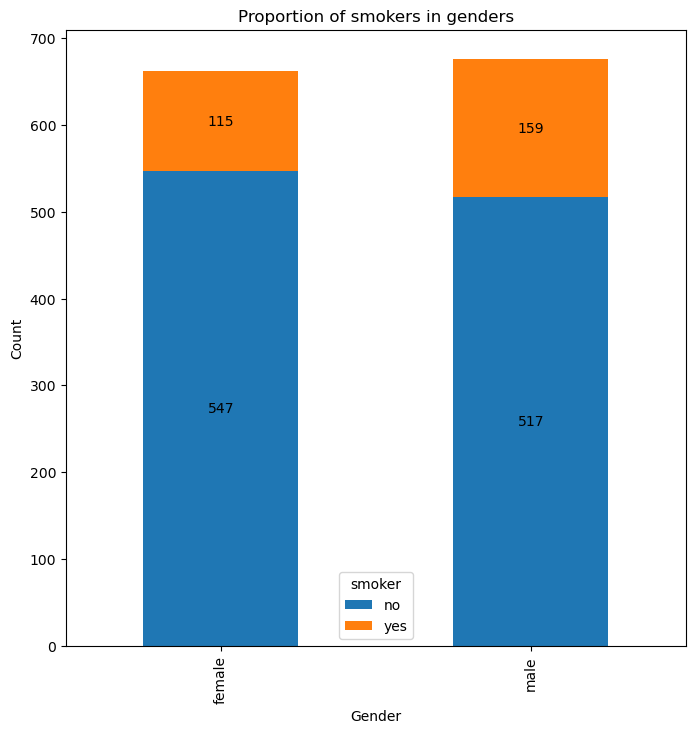

In [334]:

smoker_gender_table = pd.crosstab(index=df["sex"], columns=df["smoker"])

# Plot the bar chart
ax = smoker_gender_table.plot(kind="bar", figsize=(8,8), stacked=True)
plt.title('Proportion of smokers in genders')
plt.xlabel('Gender')
plt.ylabel('Count')

# Annotate each bar with the count value
for p in ax.patches:
    # Get the height of the bar segment
    height = p.get_height()
    # Get the x and y position of the bar segment
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2
    # Annotate the bar segment with the height (count)
    ax.annotate(f'{int(height)}', (x, y), ha='center', va='center')

plt.show()


<p style="font-size: 24px; font-family: 'Calibri Light'; line-height: 1.3; font-weight: bold; color: #3366ff;">HYPOTHESIS TESTING</p>
<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;font-weight:bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By looking into above graph, we can say "the proportions of smokers in genders are not equal". But is the difference statistically significant?</p>

<p style="font-size:18px; font-family:'Calibri Light'; line-height:1.3;">H$_0$: The proportions of smokers in genders are equal<br>
H$_a$: The proportions of smokers in genders are not equal<br><br>$\alpha$ = 0.05 &nbsp;&nbsp;&nbsp;&nbsp;(95% Confidence Interval)</p>

In [336]:
# Calculating smoker proportions
male_smokers = df[df['sex'] == 'male'].smoker.value_counts()[1]
female_smokers = df[df['sex'] == 'female'].smoker.value_counts()[1]
n_males = df.sex.value_counts()[0]
n_females = df.sex.value_counts()[1]

print(f"Smoker counts: {female_smokers} (females), {male_smokers} (males)")
print(f"Total counts: {n_females} (females), {n_males} (males)")

Smoker counts: 115 (females), 159 (males)
Total counts: 662 (females), 676 (males)


In [337]:
print(f"Proportion of smokers: {round(115/662, 2)}% (females), {round(159/676, 2)}% (males)")

Proportion of smokers: 0.17% (females), 0.24% (males)


In [338]:
stat, p_value = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

print("t_statistic =",t_statistic)
print("p_value =",p_value)

t_statistic = 1.696752635752224
p_value = 0.005324114164320532


In [339]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("Rejecting null hypothesis: " + str(reject_null))

Rejecting null hypothesis: True


<p style="font-size:24px; font-family:'Calibri Light'; line-height:1.3;font-weight:bold; color: #3366ff;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Influence of age on charges</p>

In [341]:
age = df['age']
charges = df['charges']

correlation_coefficient, p_value = pearsonr(age, charges)

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.2990081933306478
P-value: 4.886693331718271e-29


The Pearson correlation coefficient, often denoted as r, is a statistical measure that quantifies the strength and direction of the linear relationship between two continuous variables. It ranges from -1 to +1.
    
r=0.299 suggests a moderate positive correlation between the variables.

In [343]:
age_with_const = sm.add_constant(age)

model = sm.OLS(charges, age_with_const) # Ordinary Least Squares (OLS) regression model
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           4.89e-29
Time:                        11:38:57   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.0

**R Squared value is 8.9%**, which means that it has a weak explanatory power.

<p style="font-size:24px; font-family:'Calibri Light'; line-height:1.3;font-weight:bold; color: #3366ff;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Influence of smoking on charges</p>

In [346]:
# Encode 'smoker' column
label_encoder = LabelEncoder()
df['smoker_encoded'] = label_encoder.fit_transform(df['smoker'])

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df['smoker_encoded'], df['charges'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")



Pearson Correlation Coefficient: 0.7872514304984748
P-value: 8.271435842233438e-283


The Pearson correlation coefficient is 0.7872514304984748. 
This value suggests a strong positive linear relationship between the two variables being analyzed.

In [348]:
# Perform linear regression
smoker_encoded = df['smoker_encoded']
charges = df['charges']

smoker_with_const = sm.add_constant(smoker_encoded)
model = sm.OLS(charges, smoker_with_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2178.
Date:                Wed, 24 Jul 2024   Prob (F-statistic):          8.27e-283
Time:                        11:38:58   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1336   BIC:                         2.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8434.2683    229.014     36.

**R Squared value is 62%**, which means that it has a strong explanatory power.